In [1]:
%cd /content/drive/MyDrive/Torch_vnfood

/content/drive/MyDrive/Torch_vnfood


In [2]:
from __future__ import print_function, division
import os
import torch
from torch.utils.data import Dataset, DataLoader
import PIL

import torch.nn as nn
import torchvision

from utils.processing import *
from utils.vnfood_ds import *
from utils.trainer import *

In [3]:
root_train = "/content/drive/MyDrive/Torch_vnfood/datasets/dataset/Train"
root_val = "/content/drive/MyDrive/Torch_vnfood/datasets/dataset/Val"
root_test =  "/content/drive/MyDrive/Torch_vnfood/datasets/dataset/Test"


Name_food = {
    0:"Bánh mì",
    1:"Cơm tấm",
    2:"Phở",
    3:"Bánh tráng nướng"
}


In [5]:
train_paths, train_labels, val_paths, val_labels, test_paths, test_labels = getAllDataset()

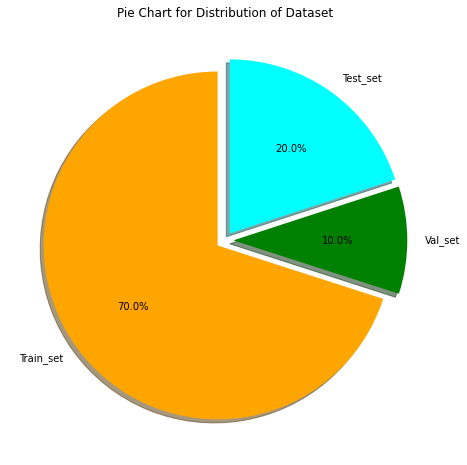

In [6]:
import matplotlib.pyplot as plt
data = {
    "Train_set" : len(train_paths),
    "Val_set": len(val_paths),
    "Test_set": len(test_paths)
}
colors = ['orange', 'green', 'cyan']
highlight =(0.05,0.05,0.05)
plt.subplots(figsize=(10, 8))
plt.pie(list(data.values()), explode=highlight, labels=data.keys(), colors=colors, autopct='%2.1f%%', shadow=True, startangle=90)
plt.title('Pie Chart for Distribution of Dataset')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
train_labels = lb.fit_transform(train_labels)
val_labels = lb.fit_transform(val_labels)
test_labels = lb.fit_transform(test_labels)

In [ ]:
train_labels = np.eye(4)[train_labels]
val_labels = np.eye(4)[val_labels]
test_labels = np.eye(4)[test_labels]
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} images)".format(pct, absolute)

In [ ]:
import pandas as pd
def plot_compare_distributions(array1, array2, array3, food_name, title1='Train images distribution', title2='', title3 = '' ):
    df_array1 = pd.DataFrame()
    df_array2 = pd.DataFrame()
    df_array3 = pd.DataFrame()
    df_array1['food_name'] = array1.argmax(axis=1)
    df_array2['food_name'] = array2.argmax(axis=1)
    df_array3['food_name'] = array3.argmax(axis=1)
    highlight =(0.05,0.05,0.05, 0.05)
    fig, axs = plt.subplots(1, 3, figsize=(20, 12), sharey=False)
    x = food_name.values()
    colors = ['orange', 'green', 'cyan', "red"]

    y = df_array1['food_name'].value_counts()
    keys_missed = list(set(food_name.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[0].pie(y, explode=highlight, labels=x, colors=colors, autopct=lambda pct: func(pct, y), shadow=True)
    axs[0].set_title(title1)
    axs[0].grid()
    
    y = df_array2['food_name'].value_counts()
    keys_missed = list(set(food_name.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[1].pie(y, explode=highlight, labels=x, colors=colors, autopct=lambda pct: func(pct, y), shadow=True)
    axs[1].set_title(title2)
    axs[1].grid()
    
    y = df_array3['food_name'].value_counts()
    keys_missed = list(set(food_name.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[2].pie(y, explode=highlight, labels=x, colors=colors, autopct=lambda pct: func(pct, y), shadow=True)
    axs[2].set_title(title3)
    axs[2].grid()
    plt.show()

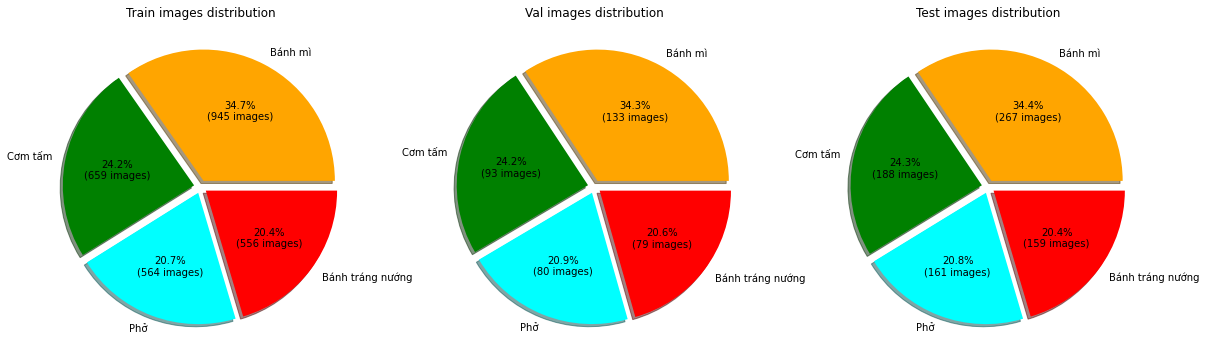

In [ ]:
plot_compare_distributions(train_labels, val_labels, test_labels, Name_food, "Train images distribution", "Val images distribution", "Test images distribution")